# Separating oscillatory and fractal activity from neurophysiologyical signals with IRASA algorithm

## Test Fouriers

/home/cmanalisis/anaconda2/envs/py3-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


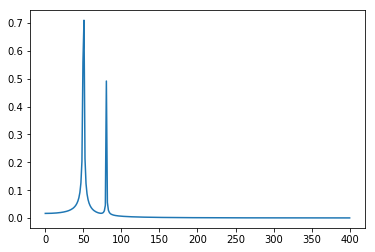

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

/home/cmanalisis/anaconda2/envs/py3-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


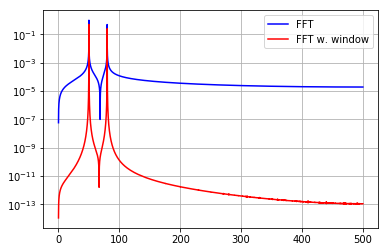

In [51]:
from scipy.fftpack import fft
# Number of sample points
N = 30000
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman, hanning
w = blackman(N)
h = hanning(N)
ywf = fft(y*h)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

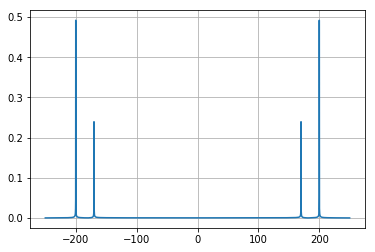

(3500,)
(3500, 1)


In [235]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 3500
# sample spacing
T = 1.0 / 500.0
x = np.linspace(0.0, N*T, N)
#y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#y = np.reshape(y,(-1,1))
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

import matplotlib.pyplot as plt

plt.plot(xf, 1.0/N * np.abs(yf))
plt.grid()
plt.show()
print(y.shape)
print(sig.shape)

## IRASA

In [163]:
Smixd

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39349143e-11, 1.39349143e-11, 1.39349143e-11, ...,
        1.39349143e-11, 1.39349143e-11, 1.39349143e-11],
       [2.22399498e-10, 2.22399498e-10, 2.22399498e-10, ...,
        2.22399498e-10, 2.22399498e-10, 2.22399498e-10],
       ...,
       [2.21264707e-10, 2.21264707e-10, 2.21264707e-10, ...,
        2.21264707e-10, 2.21264707e-10, 2.21264707e-10],
       [1.37194327e-11, 1.37194327e-11, 1.37194327e-11, ...,
        1.37194327e-11, 1.37194327e-11, 1.37194327e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

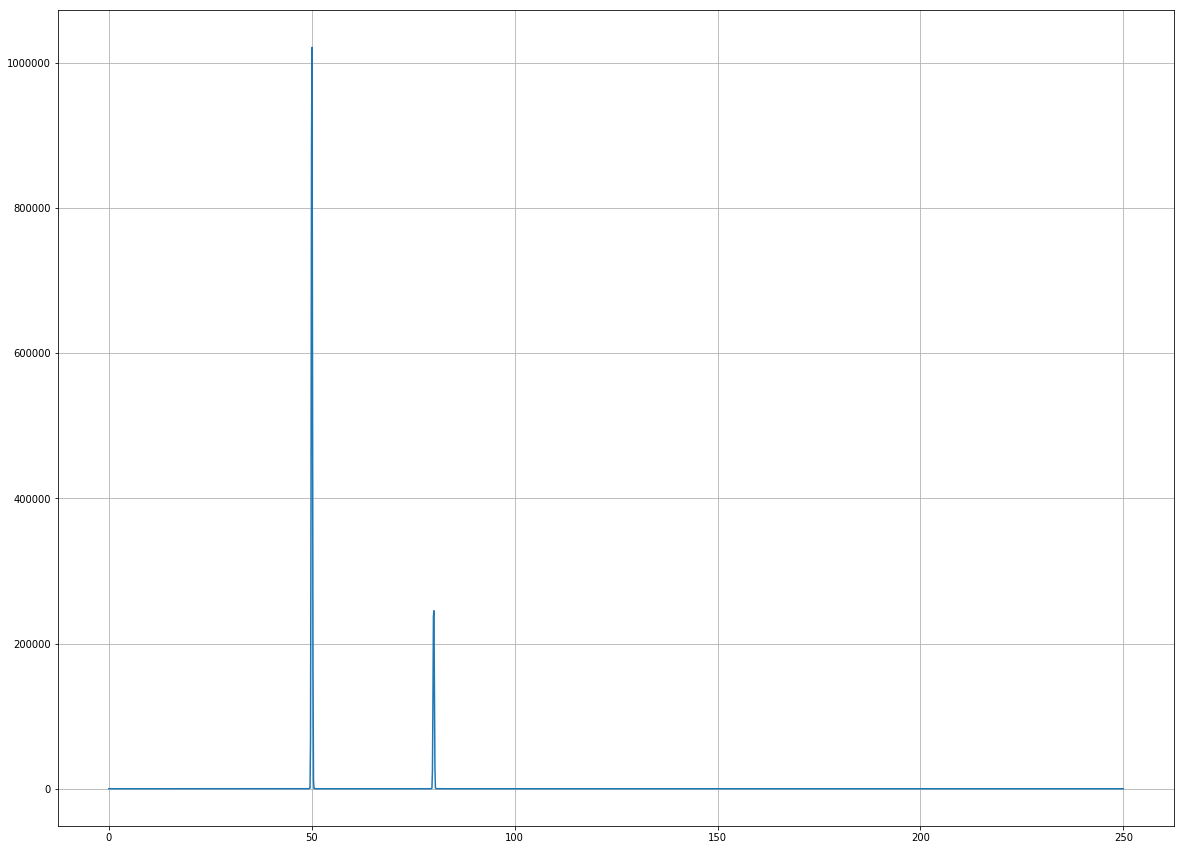

In [257]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(freq, Smixd)
plt.grid()
plt.show()


In [256]:
# IRASA Irregular-Resampling Auto-Spectral Analysis - Python version
import numpy as np
from scipy.signal import hanning
from scipy.fftpack import fft, fftfreq, fftshift


def nextpow2(x):
    """returns the smallest power of two that is greater than or equal to the
    absolute value of x.
    This function is useful for optimizing FFT operations, which are
    most efficient when sequence length is an exact power of two.
    :Example:
    .. doctest::
        >>> from spectrum import nextpow2
        >>> x = [255, 256, 257]
        >>> nextpow2(x)
        array([8, 8, 9])
    """
    res = np.ceil(np.log2(x))
    return res.astype('int') #we want integer values only but ceil gives float


def irasa(sig, srate, hset, flag_filter):
    # Given a discrete time series (sig) of length (Ntotal)
    if sig.ndim == 1:
        sig = np.reshape(sig,(-1,1))
        dim = 1
               
    Ntotal = sig.shape[0]

    # Ndata is the power of 2 that does not exceed 90% of Ntotal.
    Ndata = int(2 ** np.floor(np.log2(Ntotal*0.9)))

    # Nsubset is fixed to 15
    Nsubset = 15

    # compute the auto-power spectrum of the originally sampled time series
    L = np.floor((Ntotal-Ndata)/(Nsubset-1))

    # set nfft greater than ceil(hset(end))*Ndata, asure that do fft without truncating
    nfft = int(2 ** nextpow2(np.ceil(hset[len(hset)-1]) * Ndata))

    # set output data length Nfrac
    Nfrac = int(nfft / 2 );
    freq = srate / 2 * np.linspace(0,1,Nfrac)
    freq = freq[:]

    # compute the spectrum of mixed data
    Smixd = np.zeros((Nfrac,dim))
    Pmixd = [];
    #taper = gettaper([Ndata dim]);
    taper = hanning(Ndata)
    taper = np.tile(taper, (dim,1)).T

    # Considerar rangos parten desde el 0, y el ultimo es menos uno del indice 
    # extremo
    for k in range(0, Nsubset):
        i0 = int(L * k)
        x1 = sig[i0:i0+Ndata,:]
        # Config Multitaper IRASA
        # pure IRASA
        p1 = fft(x1.T * taper.T, nfft) / min(nfft, x1.shape[1])
        p1 = p1.T
        Pmixd = np.array([Pmixd, np.angle(p1[0:round(Nfrac),:])])
        p1[1:,:] = p1[1:,:] * 2
        Smixd = Smixd + abs(p1[0:round(Nfrac),:]) ** 2   

    Smixd = Smixd / Nsubset
    
    return Smixd, freq

# number of signal points
N = 3500
# sample spacing
T = 1.0 / 500.0
x = np.linspace(0.0, N*T, N)
sig = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
srate = 1/T
flag_filter = 1
hset = np.arange(1.1, 1.95, 0.05)
####################################################################

Smixd, freq = irasa(sig, srate, hset, flag_filter)

In [ ]:
# IRASA Irregular-Resampling Auto-Spectral Analysis - Python version
import numpy as np
from scipy.signal import hanning
from scipy.fftpack import fft, fftfreq, fftshift


def nextpow2(x):
    """returns the smallest power of two that is greater than or equal to the
    absolute value of x.
    This function is useful for optimizing FFT operations, which are
    most efficient when sequence length is an exact power of two.
    :Example:
    .. doctest::
        >>> from spectrum import nextpow2
        >>> x = [255, 256, 257]
        >>> nextpow2(x)
        array([8, 8, 9])
    """
    res = np.ceil(np.log2(x))
    return res.astype('int') #we want integer values only but ceil gives float


def irasa(sig, srate, hset, flag_filter):
    # Given a discrete time series (sig) of length (Ntotal)
    if sig.ndim == 1:
        sig = np.reshape(sig,(-1,1))
        dim = 1
               
    Ntotal = sig.shape[0]

    # Ndata is the power of 2 that does not exceed 90% of Ntotal.
    Ndata = int(2 ** np.floor(np.log2(Ntotal*0.9)))

    # Nsubset is fixed to 15
    Nsubset = 15

    # compute the auto-power spectrum of the originally sampled time series
    L = np.floor((Ntotal-Ndata)/(Nsubset-1))

    # set nfft greater than ceil(hset(end))*Ndata, asure that do fft without truncating
    nfft = int(2 ** nextpow2(np.ceil(hset[len(hset)-1]) * Ndata))

    # set output data length Nfrac
    Nfrac = int(nfft / 2 );
    freq = srate / 2 * np.linspace(0,1,Nfrac)
    freq = freq[:]

    # compute the spectrum of mixed data
    Smixd = np.zeros((Nfrac,dim))
    Pmixd = [];
    #taper = gettaper([Ndata dim]);
    taper = hanning(Ndata)
    taper = np.tile(taper, (dim,1)).T

    # Considerar rangos parten desde el 0, y el ultimo es menos uno del indice 
    # extremo
    for k in range(0, Nsubset):
        i0 = int(L * k)
        x1 = sig[i0:i0+Ndata,:]
        # Config Multitaper IRASA
        # pure IRASA
        p1 = fft(x1.T * taper.T, nfft) / min(nfft, x1.shape[1])
        p1 = p1.T
        Pmixd = np.array([Pmixd, np.angle(p1[0:round(Nfrac),:])])
        p1[1:,:] = p1[1:,:] * 2
        Smixd = Smixd + abs(p1[0:round(Nfrac),:]) ** 2   

    Smixd = Smixd / Nsubset

% filter the input signal to avoid alising when downsampling
if flag_filter == 1
    sig_filtered = sig;
    for i = 1 : size(sig,2)
        sig_filtered(:,i) = amri_sig_filtfft(sig(:,i),srate,0,srate/(2*ceil(hset(end))));
    end
end

% compute fractal component.
Sfrac = zeros(Nfrac,dim,length(hset));
for ih = 1:length(hset)
    % compute the auto-power spectrum of xh
    h = hset(ih);
    [n, d] = rat(h); % n > d
    Sh = zeros(Nfrac,dim);
    for k = 0 : Nsubset-1
        i0 = L*k + 1;
        x1 = sig(i0:i0+Ndata-1,:);
        xh = myresample(x1, n, d); 
        taperh = gettaper(size(xh));
        % Config Multitaper IRASA
        %[dps_seq,~] = dpss(size(xh,1),time_halfbandwidth,num_tapers);
        %dps_seq = repmat(dps_seq',1,1,size(xh,2));
        %for num_taper = 1:size(dps_seq,1)
        %    p(:,:,num_taper) = fft(xh.*squeeze(dps_seq(num_taper,:,:)),nfft)/min(nfft,size(xh,1));
        %end
        %ph = mean(p,3);
        % pure IRASA
        ph = fft(xh.*taperh,nfft)/min(nfft,size(xh,1));
        ph(2:end,:) = ph(2:end,:)*2;
        tmp = (abs(ph)).^2;
        Sh = Sh + tmp(1:Nfrac,:);
    end
    Sh = Sh / Nsubset;
    
    % compute the auto-power spectrum of X1h
    S1h = zeros(Nfrac, dim);
    for k = 0 : Nsubset - 1
        i0 = L*k + 1;
        if (flag_filter==1)
            x1 = sig_filtered(i0:1:i0+Ndata-1,:);
        else
            x1 = sig(i0:1:i0+Ndata-1,:);
        end
        x1h = myresample(x1,d,n);
        taper1h = gettaper(size(x1h));
        % Config Multitaper IRASA
        %[dps_seq,~] = dpss(size(x1h,1),time_halfbandwidth,num_tapers);
        %dps_seq = repmat(dps_seq',1,1,size(x1h,2));
        %for num_taper = 1:size(dps_seq,1)
        %    p(:,:,num_taper) = fft(x1h.*squeeze(dps_seq(num_taper,:,:)),nfft)/min(nfft,size(x1h,1));
        %end
        %p1h = mean(p,3);
        % pure IRASA
        p1h = fft(x1h.*taper1h,nfft)/min(nfft,size(x1h,1));
        p1h(2:end,:) = p1h(2:end,:)*2;
        tmp = (abs(p1h)).^2;
        S1h = S1h + tmp(1:Nfrac,:);
    end
    S1h = S1h / Nsubset;
    Sfrac(:,:,ih)= sqrt(Sh.*S1h);
end

% taking median
Sfrac = median(Sfrac,3);
end
                          
    return Smixd, Sfrac, freq, Pmixd